In [42]:
import yfinance as yf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [19]:
# Set some global variable
COL = 'Close'

## Section 1: Time Series

In [3]:

# Define the tickers
tickers = ["SPY", "QQQ"]

end_date = datetime(2023, 12, 31)
start_date = end_date - timedelta(days=450)

# end_date = datetime.now()
# start_date = "2023-01-01"
# end_date = "2023-12-31"

# Download data as dataframe
SPY_data = yf.download(tickers[0], start=start_date, end=end_date).tail(300)
QQQ_data = yf.download(tickers[1], start=start_date, end=end_date).tail(300)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
SPY_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-20,368.029999,372.670013,364.609985,365.410004,358.294098,88283100
2022-10-21,365.119995,374.799988,363.540009,374.290009,367.001190,131038400
2022-10-24,375.890015,380.059998,373.109985,378.869995,371.492004,85436900
2022-10-25,378.790009,385.250000,378.670013,384.920013,377.424225,78846300
2022-10-26,381.619995,387.579987,381.350006,382.019989,374.580627,104087300


In [5]:
def plot_candlestick_graph(df, ticker):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])])
    
    fig.update_layout(
        title=f'Timeseries {ticker}',
        yaxis_title='Price')

    fig.show()
    
def plot_timeseries(df, col, ticker):
    plt.figure(figsize=(8,4))
    plt.plot(df[col])
    plt.title(f'Price over Time: {ticker}', fontsize=12)
    plt.ylabel(f'Price', fontsize=12)

    
plot_candlestick_graph(SPY_data, 'SPY')
plot_candlestick_graph(QQQ_data, 'QQQ')

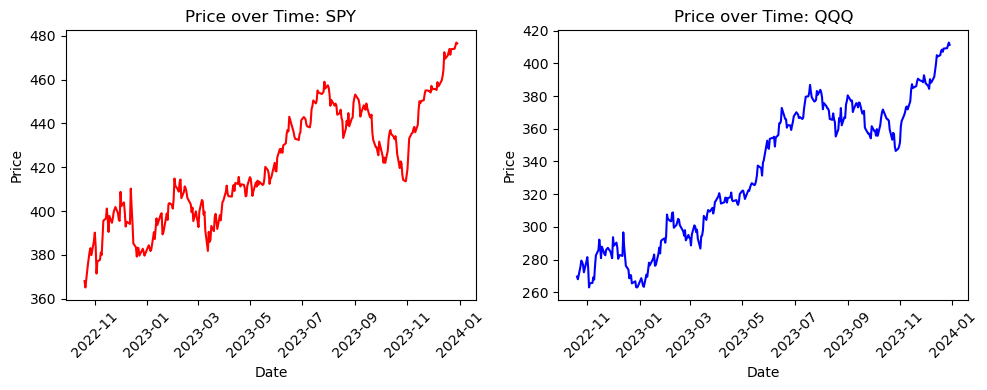

In [14]:

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# First subplot
axs[0].plot(SPY_data.index, SPY_data[COL], 'r')  # 'r' is the color red
axs[0].set_title('Price over Time: SPY')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].tick_params(axis='x', rotation=45)

# Second subplot
axs[1].plot(QQQ_data.index, QQQ_data[COL], 'b')  # 'b' is the color blue
axs[1].set_title('Price over Time: QQQ')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Section 2: Moving Averages

In [7]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model(df, col, order, show_summary = False):
    # endog: "endogenous variable," which refers to the main variable of interest in your time series analysis. 
    ARIMA_model = ARIMA(endog=df[col], order=order)
    results = ARIMA_model.fit()
    if show_summary:
        print(results.summary())
    return results


ma_5 = arima_model(df=SPY_data, col=COL, order=(0, 0, 5), show_summary=True)


/Users/chenkangan/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/chenkangan/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/chenkangan/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/chenkangan/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  300
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -1002.205
Date:                Tue, 30 Jan 2024   AIC                           2018.410
Time:                        23:05:55   BIC                           2044.336
Sample:                             0   HQIC                          2028.786
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        419.1430      2.563    163.555      0.000     414.120     424.166
ma.L1          1.4274      0.607      2.353      0.019       0.238       2.616
ma.L2          1.2945      0.264      4.897      0.0

/Users/chenkangan/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



## Section 3: Auto-correlation Functions

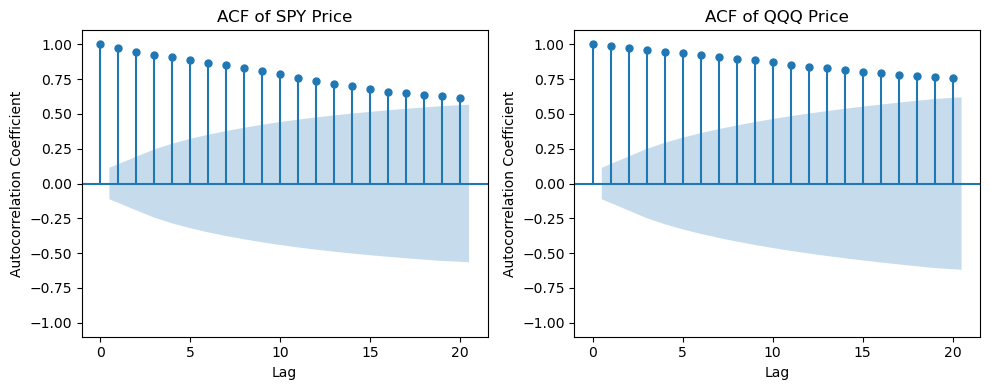

In [32]:
# Plot the ACF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(SPY_data[COL], lags=20, ax=axs[0])  # You can adjust the number of lags as needed
axs[0].set_title('ACF of SPY Price')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Autocorrelation Coefficient')
axs[0].set_ylim(-1.1, 1.1)

plot_acf(QQQ_data[COL], lags=20, ax=axs[1])  # You can adjust the number of lags as needed
axs[1].set_title('ACF of QQQ Price')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Autocorrelation Coefficient')
axs[1].set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()



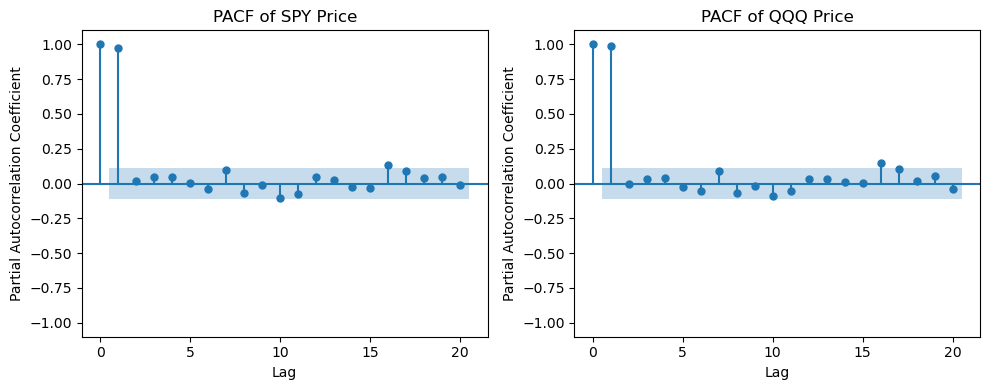

In [33]:
# Plot the ACF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_pacf(SPY_data[COL], lags=20, ax=axs[0])  # You can adjust the number of lags as needed
axs[0].set_title('PACF of SPY Price')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Partial Autocorrelation Coefficient')
axs[0].set_ylim(-1.1, 1.1)

plot_pacf(QQQ_data[COL], lags=20, ax=axs[1])  # You can adjust the number of lags as needed
axs[1].set_title('PACF of QQQ Price')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Partial Autocorrelation Coefficient')
axs[1].set_ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

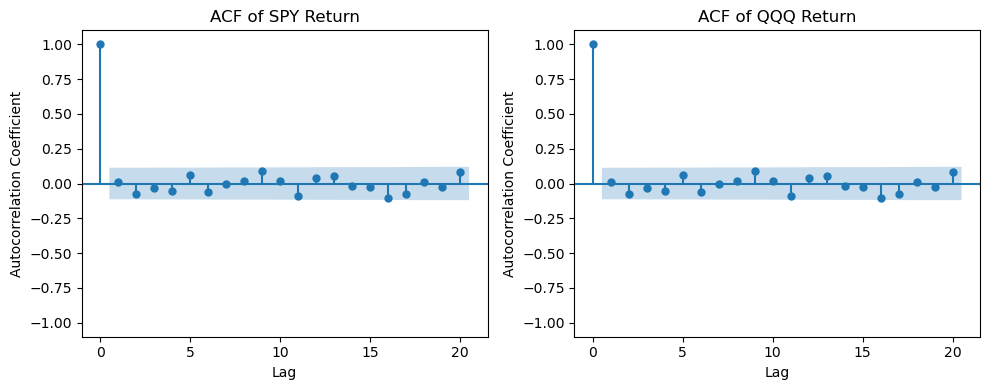

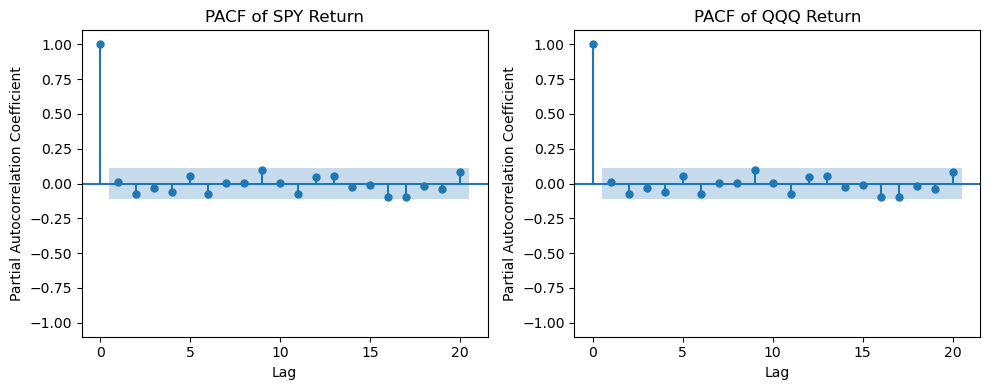

In [46]:
def get_return(data):
    return (np.array(SPY_data[COL][1:]) - np.array(SPY_data[COL][:-1]))/np.array(SPY_data[COL][1:])

# Plot the ACF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(get_return(SPY_data[COL]), lags=20, ax=axs[0])  # You can adjust the number of lags as needed
axs[0].set_title('ACF of SPY Return')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Autocorrelation Coefficient')
axs[0].set_ylim(-1.1, 1.1)

plot_acf(get_return(QQQ_data[COL]), lags=20, ax=axs[1])  # You can adjust the number of lags as needed
axs[1].set_title('ACF of QQQ Return')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Autocorrelation Coefficient')
axs[1].set_ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()
    
# Plot the PACF
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_pacf(get_return(SPY_data[COL]), lags=20, ax=axs[0])  # You can adjust the number of lags as needed
axs[0].set_title('PACF of SPY Return')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Partial Autocorrelation Coefficient')
axs[0].set_ylim(-1.1, 1.1)

plot_pacf(get_return(QQQ_data[COL]), lags=20, ax=axs[1])  # You can adjust the number of lags as needed
axs[1].set_title('PACF of QQQ Return')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Partial Autocorrelation Coefficient')
axs[1].set_ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()